<a href="https://colab.research.google.com/github/TharinduGee/Prediction_Models/blob/main/Carbon_Emission_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction model of the carbon emmision of vehicle by their model data 
we can use data of US envirionment protecting agency to this project
First we should fetch data from link https://www.epa.gov/system/files/documents/2022-04/22-tstcar-2022-04-15.xlsx

In [135]:
import numpy as np;
import pandas as pd;
import matplotlib as plt;
import tensorflow as tf;

In [136]:
record = pd.read_excel('https://www.epa.gov/system/files/documents/2022-04/22-tstcar-2022-04-15.xlsx');

In [137]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4397 entries, 0 to 4396
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Model Year                      4397 non-null   int64  
 1   Vehicle Manufacturer Name       4397 non-null   object 
 2   Veh Mfr Code                    4397 non-null   object 
 3   Represented Test Veh Make       4397 non-null   object 
 4   Represented Test Veh Model      4397 non-null   object 
 5   Test Vehicle ID                 4397 non-null   object 
 6   Test Veh Configuration #        4397 non-null   int64  
 7   Test Veh Displacement (L)       4397 non-null   float64
 8   Actual Tested Testgroup         4397 non-null   object 
 9   Vehicle Type                    4397 non-null   object 
 10  Rated Horsepower                4397 non-null   int64  
 11  # of Cylinders and Rotors       4133 non-null   float64
 12  Engine Code                     43

As the second step we should do data preprocessing before train data.

In [138]:
for i in record.columns:
  print(record[i].name , record[i].isna().sum())

Model Year 0
Vehicle Manufacturer Name 0
Veh Mfr Code 0
Represented Test Veh Make 0
Represented Test Veh Model 0
Test Vehicle ID 0
Test Veh Configuration # 0
Test Veh Displacement (L) 0
Actual Tested Testgroup 0
Vehicle Type 0
Rated Horsepower 0
# of Cylinders and Rotors 264
Engine Code 0
Tested Transmission Type Code 0
Tested Transmission Type 0
# of Gears 0
Transmission Lockup? 0
Drive System Code 0
Drive System Description 0
Transmission Overdrive Code 0
Transmission Overdrive Desc 0
Equivalent Test Weight (lbs.) 0
Axle Ratio 0
N/V Ratio 0
Shift Indicator Light Use Cd 0
Shift Indicator Light Use Desc 0
Test Number 0
Test Originator 0
Analytically Derived FE? 0
ADFE Test Number 3731
ADFE Total Road Load HP 3731
ADFE Equiv. Test Weight (lbs.) 3731
ADFE N/V Ratio 3731
Test Procedure Cd 0
Test Procedure Description 0
Test Fuel Type Cd 0
Test Fuel Type Description 0
Test Category 0
THC (g/mi) 799
CO (g/mi) 783
CO2 (g/mi) 369
NOx (g/mi) 797
PM (g/mi) 3723
CH4 (g/mi) 1078
N2O (g/mi) 2148
R

In [139]:
for i in record[["Vehicle Manufacturer Name","Vehicle Type","Rated Horsepower","# of Cylinders and Rotors","Tested Transmission Type","# of Gears","Test Procedure Cd","CO2 (g/mi)"]]:
  print(record[i].name , record[i].isna().sum())

Vehicle Manufacturer Name 0
Vehicle Type 0
Rated Horsepower 0
# of Cylinders and Rotors 264
Tested Transmission Type 0
# of Gears 0
Test Procedure Cd 0
CO2 (g/mi) 369


In [140]:
for i in record[["Vehicle Manufacturer Name","Vehicle Type","Rated Horsepower","# of Cylinders and Rotors","Tested Transmission Type","# of Gears","Test Procedure Cd","CO2 (g/mi)"]]:
  print(record[i].value_counts())

GM                      624
FOMOCO                  491
Toyota                  483
BMW                     378
Volkswagen Group of     365
Hyundai                 350
FCA US LLC              270
Kia                     207
Nissan                  202
Porsche                 165
Honda                   164
Mercedes-Benz           124
Jaguar Land Rover L     115
Subaru                  103
Volvo                    66
Ferrari                  64
Tesla                    58
MAZDA                    40
Mitsubishi Motors Co     38
McLaren Automotive       27
Maserati                 22
Lucid USA, Inc           12
Rivian Automotive L       8
Rolls-Royce               8
aston martin              8
Karma Automotive, L       5
Name: Vehicle Manufacturer Name, dtype: int64
Car      1949
Truck    1888
Both      560
Name: Vehicle Type, dtype: int64
355    258
400    180
270    106
300    101
177     87
      ... 
631      2
620      2
409      2
321      2
316      2
Name: Rated Horsepower, Length

In [141]:
new_record = record[["Vehicle Manufacturer Name","Vehicle Type","Rated Horsepower","# of Cylinders and Rotors","Tested Transmission Type","# of Gears","Test Procedure Cd","CO2 (g/mi)"]]
new_record.dropna(how='all',axis = 'rows')



,Vehicle Manufacturer Name,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Tested Transmission Type,# of Gears,Test Procedure Cd,CO2 (g/mi)
0,aston martin,Car,503,8.0,Semi-Automatic,8,21,386.660000
1,aston martin,Car,503,8.0,Semi-Automatic,8,3,259.740000
2,aston martin,Car,715,12.0,Semi-Automatic,8,21,499.690000
3,aston martin,Car,715,12.0,Semi-Automatic,8,3,290.250000
4,aston martin,Both,550,8.0,Automatic,9,21,521.260000
...,...,...,...,...,...,...,...,...
4392,Volvo,Both,312,4.0,Semi-Automatic,8,31,257.000000
4393,Volvo,Both,312,4.0,Semi-Automatic,8,81,NaN
4394,Volvo,Both,312,4.0,Semi-Automatic,8,84,NaN
4395,Volvo,Both,312,4.0,Semi-Automatic,8,21,268.406342


In [142]:
new_record.fillna(method = 'ffill', axis = 'rows')

,Vehicle Manufacturer Name,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Tested Transmission Type,# of Gears,Test Procedure Cd,CO2 (g/mi)
0,aston martin,Car,503,8.0,Semi-Automatic,8,21,386.660000
1,aston martin,Car,503,8.0,Semi-Automatic,8,3,259.740000
2,aston martin,Car,715,12.0,Semi-Automatic,8,21,499.690000
3,aston martin,Car,715,12.0,Semi-Automatic,8,3,290.250000
4,aston martin,Both,550,8.0,Automatic,9,21,521.260000
...,...,...,...,...,...,...,...,...
4392,Volvo,Both,312,4.0,Semi-Automatic,8,31,257.000000
4393,Volvo,Both,312,4.0,Semi-Automatic,8,81,257.000000
4394,Volvo,Both,312,4.0,Semi-Automatic,8,84,257.000000
4395,Volvo,Both,312,4.0,Semi-Automatic,8,21,268.406342


Now, we should split data to the train and test.:

In [143]:
target = new_record.pop("CO2 (g/mi)")
train_data = new_record.iloc[:3000,:]
test_data =  new_record.iloc[3000:, :]
target = target.fillna(method = 'ffill', axis = 'rows')
new_record

,Vehicle Manufacturer Name,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Tested Transmission Type,# of Gears,Test Procedure Cd
0,aston martin,Car,503,8.0,Semi-Automatic,8,21
1,aston martin,Car,503,8.0,Semi-Automatic,8,3
2,aston martin,Car,715,12.0,Semi-Automatic,8,21
3,aston martin,Car,715,12.0,Semi-Automatic,8,3
4,aston martin,Both,550,8.0,Automatic,9,21
...,...,...,...,...,...,...,...
4392,Volvo,Both,312,4.0,Semi-Automatic,8,31
4393,Volvo,Both,312,4.0,Semi-Automatic,8,81
4394,Volvo,Both,312,4.0,Semi-Automatic,8,84
4395,Volvo,Both,312,4.0,Semi-Automatic,8,21


Now, we have to choose suitable algorithm for train data and train data.

In [144]:
numerical_features_names = ["Rated Horsepower","# of Cylinders and Rotors","# of Gears","Test Procedure Cd" ]
categorical_features_names = ["Vehicle Manufacturer Name","Vehicle Type","Tested Transmission Type"]

inputs = {}

for name, column in new_record.items():
  if type(column[0]) == str:
    dtype = tf.string
  elif (name in categorical_features_names):
    dtype = tf.int64
  else:
    dtype = tf.float32


  inputs[name] = tf.keras.Input(shape=(), name=name, dtype=dtype)

inputs


{'# of Cylinders and Rotors': <KerasTensor: shape=(None,) dtype=float32 (created by layer '# of Cylinders and Rotors')>,
 '# of Gears': <KerasTensor: shape=(None,) dtype=float32 (created by layer '# of Gears')>,
 'Rated Horsepower': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'Rated Horsepower')>,
 'Test Procedure Cd': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'Test Procedure Cd')>,
 'Tested Transmission Type': <KerasTensor: shape=(None,) dtype=string (created by layer 'Tested Transmission Type')>,
 'Vehicle Manufacturer Name': <KerasTensor: shape=(None,) dtype=string (created by layer 'Vehicle Manufacturer Name')>,
 'Vehicle Type': <KerasTensor: shape=(None,) dtype=string (created by layer 'Vehicle Type')>}

In [145]:
def stack_dict(inputs, fun=tf.stack):
    values = []
    for key in sorted(inputs.keys()):
      values.append(tf.cast(inputs[key], tf.float32))

    return fun(values, axis=-1)

numerical_features = new_record[numerical_features_names]
Normalizer = tf.keras.layers.Normalization(axis=1)
Normalizer.adapt(stack_dict(dict(numerical_features)))




In [146]:
numeric_inputs = {}
preprocessed = []

for name in numerical_features_names:
  numeric_inputs[name] = inputs[name]

numeric_inputs = stack_dict(numeric_inputs)
numeric_normalized = Normalizer(numeric_inputs)

preprocessed.append(numeric_normalized)

preprocessed

[<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_5')>]

In [147]:
for name in categorical_features_names:
  vocab = sorted(set(new_record[name]))
  print("name : {}".format(name))
  print("vocab : {}".format(vocab))

  if type(vocab[0]) is str:
    lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
  else:
    lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')
  

  x = inputs[name][:,tf.newaxis]
  x = lookup(x)
  preprocessed.append(x)

name : Vehicle Manufacturer Name
vocab : ['BMW', 'FCA US LLC', 'FOMOCO', 'Ferrari', 'GM', 'Honda', 'Hyundai', 'Jaguar Land Rover L', 'Karma Automotive, L', 'Kia', 'Lucid USA, Inc', 'MAZDA', 'Maserati', 'McLaren Automotive ', 'Mercedes-Benz', 'Mitsubishi Motors Co', 'Nissan', 'Porsche', 'Rivian Automotive L', 'Rolls-Royce', 'Subaru', 'Tesla', 'Toyota', 'Volkswagen Group of', 'Volvo', 'aston martin']
name : Vehicle Type
vocab : ['Both', 'Car', 'Truck']
name : Tested Transmission Type
vocab : ['Automated Manual', 'Automated Manual- Selectable (e.g. Automated Manual with paddles)', 'Automatic', 'Continuously Variable', 'Manual', 'Other', 'Selectable Continuously Variable (e.g. CVT with paddles)', 'Semi-Automatic']


In [148]:
preprocessed
preprocessed_result = tf.concat(preprocessed,axis=-1)
preprocessed_result

<KerasTensor: shape=(None, 44) dtype=float32 (created by layer 'tf.concat_5')>

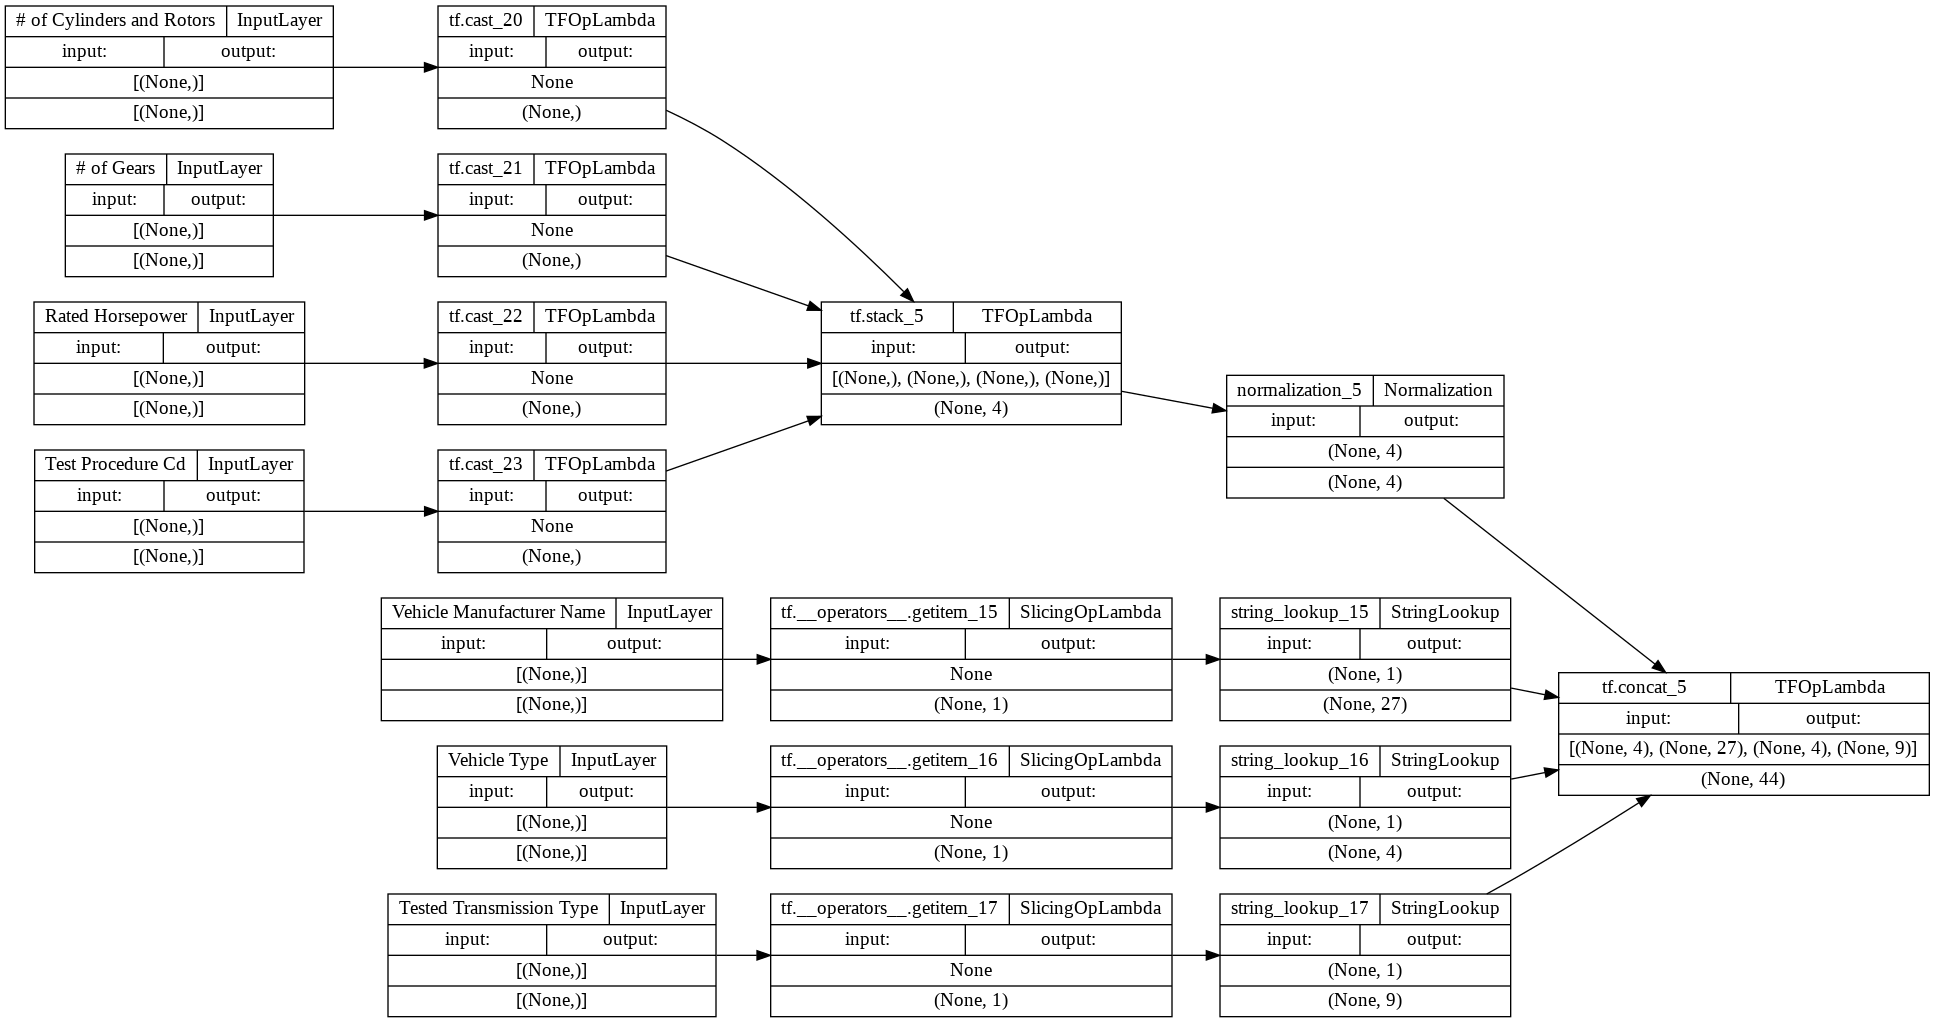

In [149]:
preprocessor = tf.keras.Model(inputs, preprocessed_result)
tf.keras.utils.plot_model(preprocessor, rankdir="LR", show_shapes=True)

In [157]:
body = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
    tf.keras.layers.Dense(1)
])

inputs

{'# of Cylinders and Rotors': <KerasTensor: shape=(None,) dtype=float32 (created by layer '# of Cylinders and Rotors')>,
 '# of Gears': <KerasTensor: shape=(None,) dtype=float32 (created by layer '# of Gears')>,
 'Rated Horsepower': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'Rated Horsepower')>,
 'Test Procedure Cd': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'Test Procedure Cd')>,
 'Tested Transmission Type': <KerasTensor: shape=(None,) dtype=string (created by layer 'Tested Transmission Type')>,
 'Vehicle Manufacturer Name': <KerasTensor: shape=(None,) dtype=string (created by layer 'Vehicle Manufacturer Name')>,
 'Vehicle Type': <KerasTensor: shape=(None,) dtype=string (created by layer 'Vehicle Type')>}

In [158]:
x = preprocessor(inputs)
x

<KerasTensor: shape=(None, 44) dtype=float32 (created by layer 'model_12')>

In [159]:
result = body(x)
result

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sequential_7')>

In [160]:
model = tf.keras.Model(inputs, result)

model.compile(optimizer='adam',
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [161]:
history = model.fit( dict(new_record), target,epochs=5, batch_size = 100)

Epoch 1/5
44/44 [==============================] - 1s 3ms/step - loss: nan - accuracy: 2.2743e-04
Epoch 2/5
44/44 [==============================] - 0s 3ms/step - loss: nan - accuracy: 2.2743e-04
Epoch 3/5
44/44 [==============================] - 0s 3ms/step - loss: nan - accuracy: 2.2743e-04
Epoch 4/5
44/44 [==============================] - 0s 3ms/step - loss: nan - accuracy: 2.2743e-04
Epoch 5/5
44/44 [==============================] - 0s 3ms/step - loss: nan - accuracy: 2.2743e-04
